<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/Forcasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/PM10.csv')
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/PM2.5.csv')

In [163]:
combined_df=pd.merge(df1,df2)

In [4]:
combined_df.shape

(3216, 6)

In [5]:
combined_df.head()

,dt_time,pm10cnc,temp,rh,deviceid,pm2.5cnc
0,1/2/2023 9:00,69.585366,32.000000,51.121951,E098060F06C3,55.560976
1,1/2/2023 10:00,66.322581,32.000000,49.177419,E098060F06C3,52.112903
2,1/2/2023 11:00,69.730159,32.380952,45.015873,E098060F06C3,56.047619
3,1/2/2023 12:00,69.225806,32.967742,42.435484,E098060F06C3,55.080645
4,1/2/2023 13:00,70.571429,32.571429,42.047619,E098060F06C3,57.095238


In [6]:
combined_df.tail()

,dt_time,pm10cnc,temp,rh,deviceid,pm2.5cnc
3211,6/30/2023 6:00,0.629032,34.274194,44.935484,E098060F06C3,0.322581
3212,6/30/2023 7:00,2.380952,35.746032,41.968254,E098060F06C3,1.761905
3213,6/30/2023 8:00,1.225806,36.661290,38.338710,E098060F06C3,0.709677
3214,6/30/2023 9:00,1.129032,36.500000,37.387097,E098060F06C3,0.612903
3215,6/30/2023 10:00,1.772727,36.000000,36.818182,E098060F06C3,1.136364


In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dt_time   3216 non-null   object 
 1   pm10cnc   3216 non-null   float64
 2   temp      3216 non-null   float64
 3   rh        3216 non-null   float64
 4   deviceid  3216 non-null   object 
 5   pm2.5cnc  3216 non-null   float64
dtypes: float64(4), object(2)
memory usage: 175.9+ KB


In [8]:
combined_df.isnull().sum()

dt_time     0
pm10cnc     0
temp        0
rh          0
deviceid    0
pm2.5cnc    0
dtype: int64

In [9]:
combined_df['dt_time']=pd.to_datetime(combined_df['dt_time'])

<Axes: >

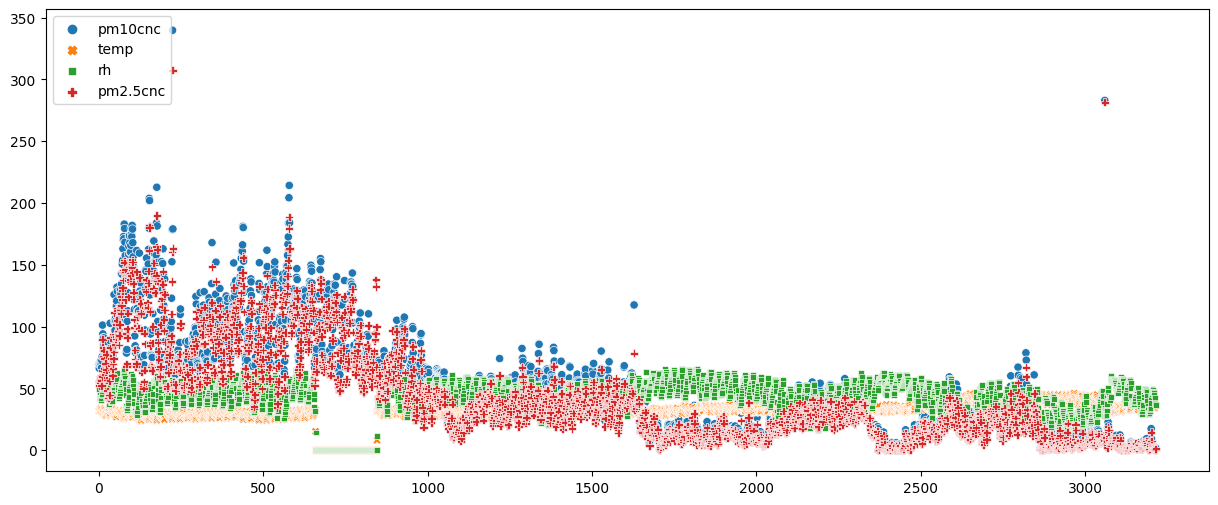

In [10]:
plt.figure(figsize=(15, 6))
sns.scatterplot(combined_df)

<Figure size 1500x600 with 0 Axes>

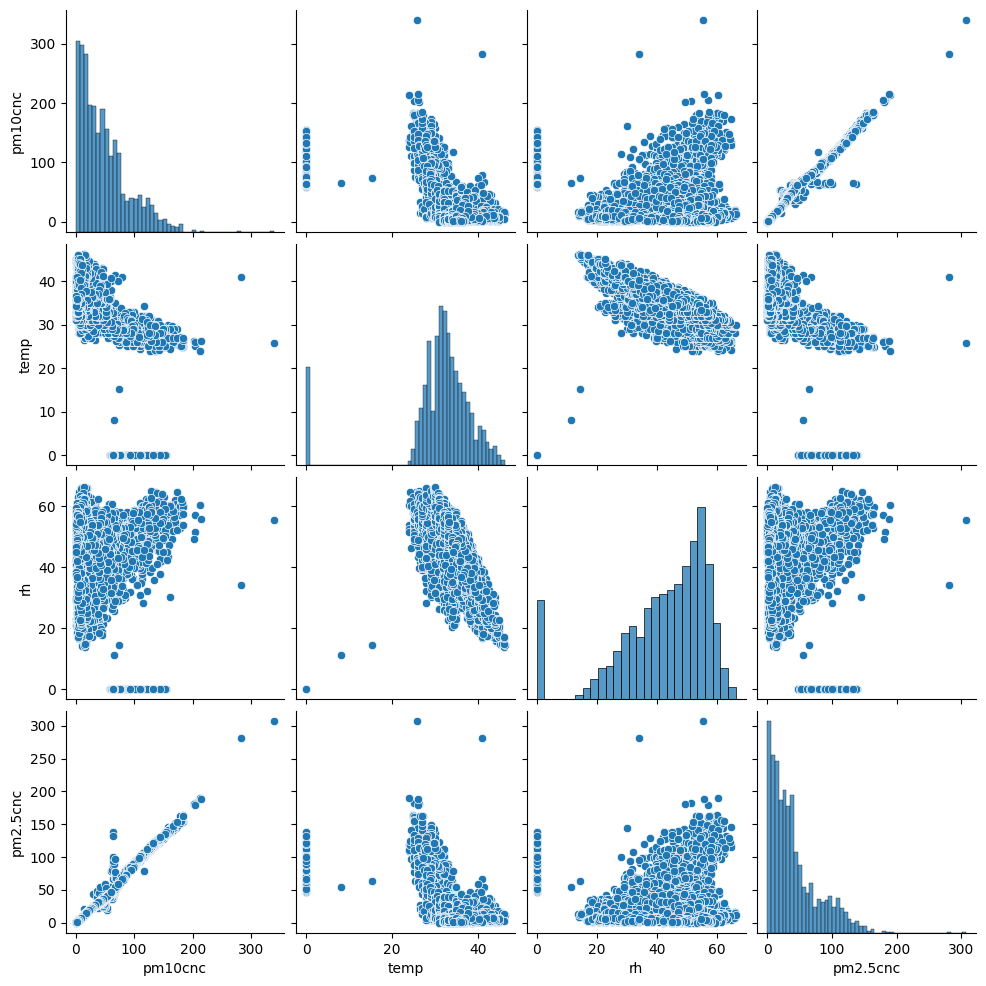

In [11]:
plt.figure(figsize=(15, 6))
sns.pairplot(combined_df)
plt.show()

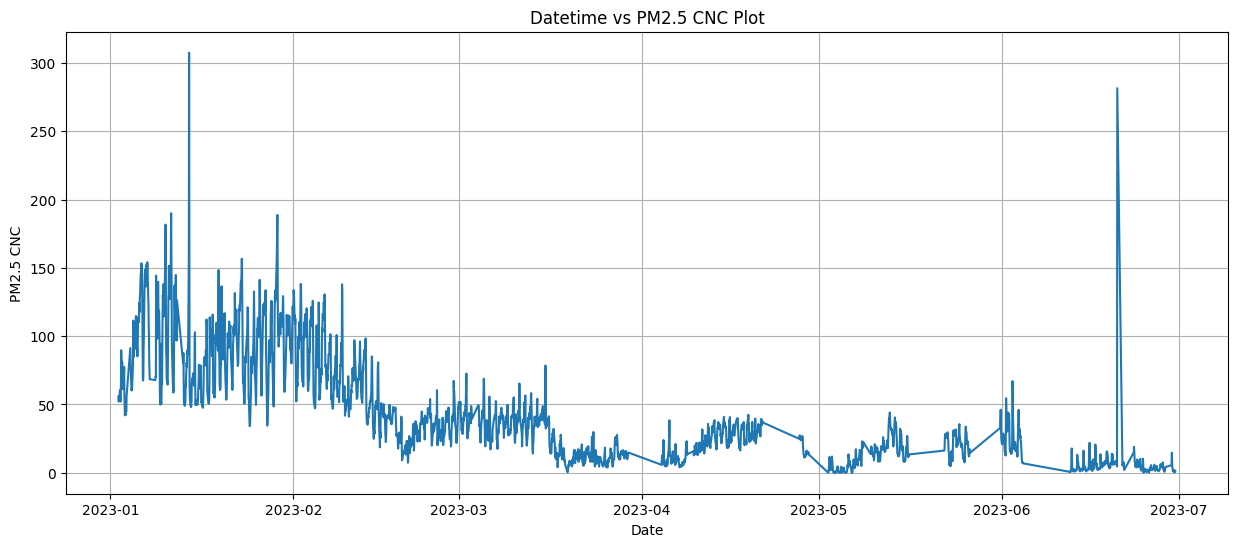

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(combined_df['dt_time'], combined_df['pm2.5cnc'])
plt.xlabel('Date')
plt.ylabel('PM2.5 CNC')
plt.title('Datetime vs PM2.5 CNC Plot')
plt.grid(True)
plt.show()

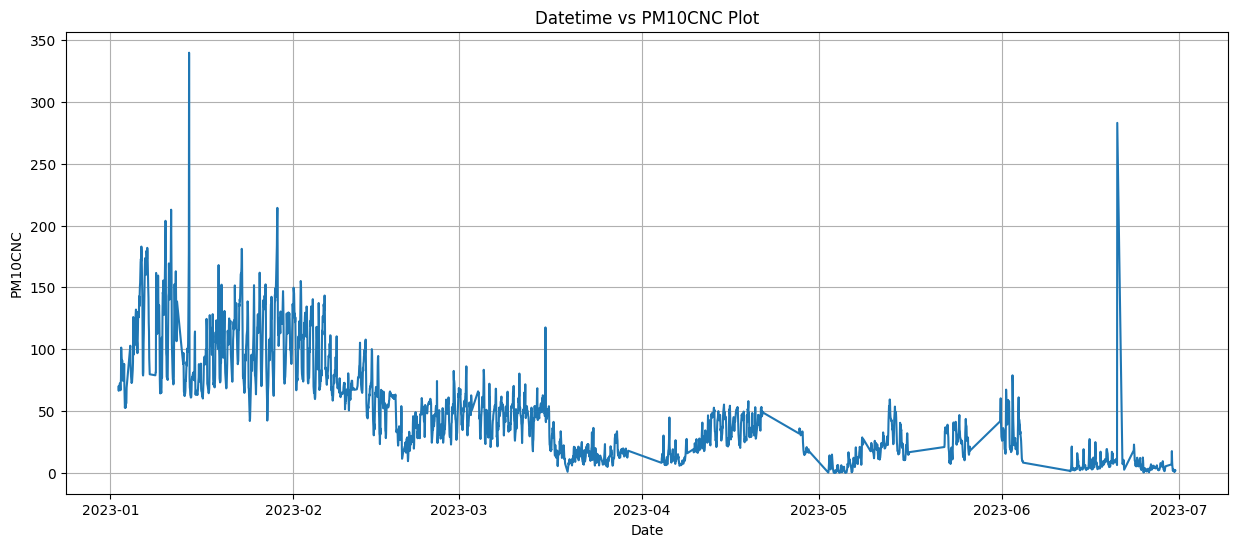

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(combined_df['dt_time'], combined_df['pm10cnc'])
plt.xlabel('Date')
plt.ylabel('PM10CNC')
plt.title('Datetime vs PM10CNC Plot')
plt.grid(True)
plt.show()

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

## **ARIMA Algorithm**

In [15]:
# Extract the target variables
target_pm10cnc = combined_df['pm10cnc']
target_pm2_5cnc = combined_df['pm2.5cnc']

In [16]:
# Split the data into training and testing sets
X_train_pm10cnc, X_test_pm10cnc = train_test_split(target_pm10cnc, test_size=0.2, shuffle=False)
X_train_pm2_5cnc, X_test_pm2_5cnc = train_test_split(target_pm2_5cnc, test_size=0.2, shuffle=False)

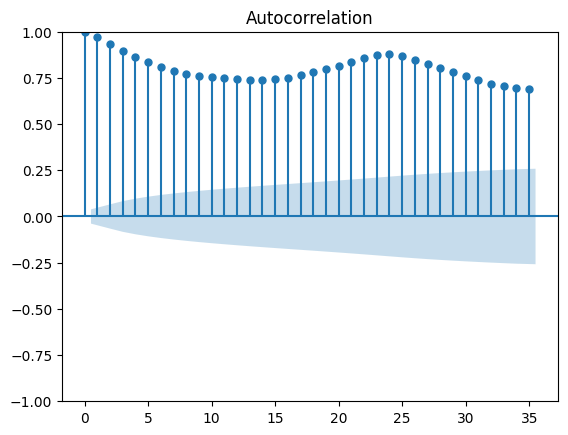

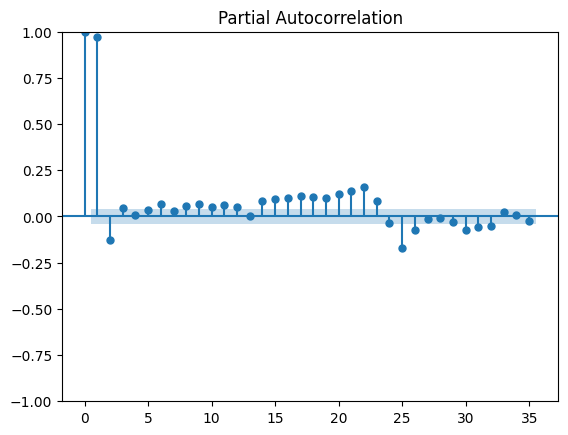

In [17]:
# Time series analysis to determine p, d, q values
# Plot ACF and PACF for 'pm10cnc'
plot_acf(X_train_pm10cnc)
plot_pacf(X_train_pm10cnc)
plt.show()

In [18]:
# Determine p, d, and q for 'pm10cnc' from ACF and PACF plots
p_pm10cnc = 1  # Adjust based on ACF plot
d_pm10cnc = 1  # Adjust if differencing is needed
q_pm10cnc = 1  # Adjust based on PACF plot

In [19]:
# Build and fit the ARIMA model for 'pm10cnc'
model_pm10cnc = ARIMA(X_train_pm10cnc, order=(p_pm10cnc, d_pm10cnc, q_pm10cnc))
model_fit_pm10cnc = model_pm10cnc.fit()

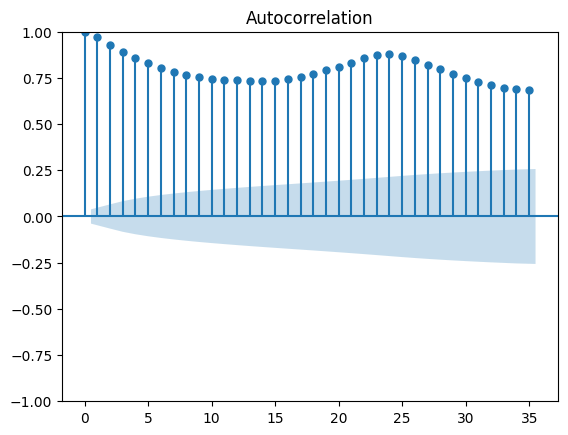

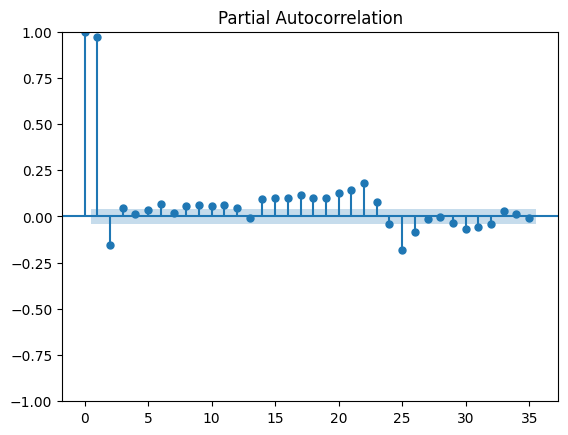

In [20]:
# Time series analysis to determine p, d, q values for 'pm2.5cnc'
plot_acf(X_train_pm2_5cnc)
plot_pacf(X_train_pm2_5cnc)
plt.show()

In [21]:
# Determine p, d, and q for 'pm2.5cnc' from ACF and PACF plots
p_pm2_5cnc = 1  # Adjust based on ACF plot
d_pm2_5cnc = 1  # Adjust if differencing is needed
q_pm2_5cnc = 1  # Adjust based on PACF plot

In [22]:
# Build and fit the ARIMA model for 'pm2.5cnc'
model_pm2_5cnc = ARIMA(X_train_pm2_5cnc, order=(p_pm2_5cnc, d_pm2_5cnc, q_pm2_5cnc))
model_fit_pm2_5cnc = model_pm2_5cnc.fit()

In [23]:
# Forecast for 'pm10cnc'
forecast_steps_pm10cnc = len(X_test_pm10cnc)
forecast_pm10cnc = model_fit_pm10cnc.forecast(steps=forecast_steps_pm10cnc)

In [24]:
# Forecast for 'pm2.5cnc'
forecast_steps_pm2_5cnc = len(X_test_pm2_5cnc)
forecast_pm2_5cnc = model_fit_pm2_5cnc.forecast(steps=forecast_steps_pm2_5cnc)

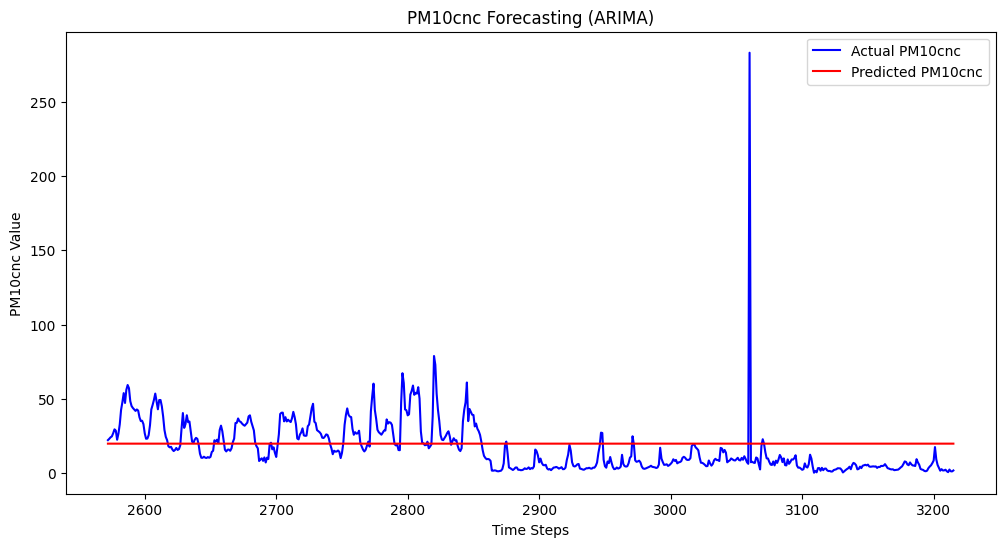

In [25]:
# Plot the actual and predicted values for 'pm10cnc'
plt.figure(figsize=(12, 6))
plt.plot(X_test_pm10cnc, label='Actual PM10cnc', color='blue')
plt.plot(forecast_pm10cnc, label='Predicted PM10cnc', color='red')
plt.title('PM10cnc Forecasting (ARIMA)')
plt.xlabel('Time Steps')
plt.ylabel('PM10cnc Value')
plt.legend()
plt.show()

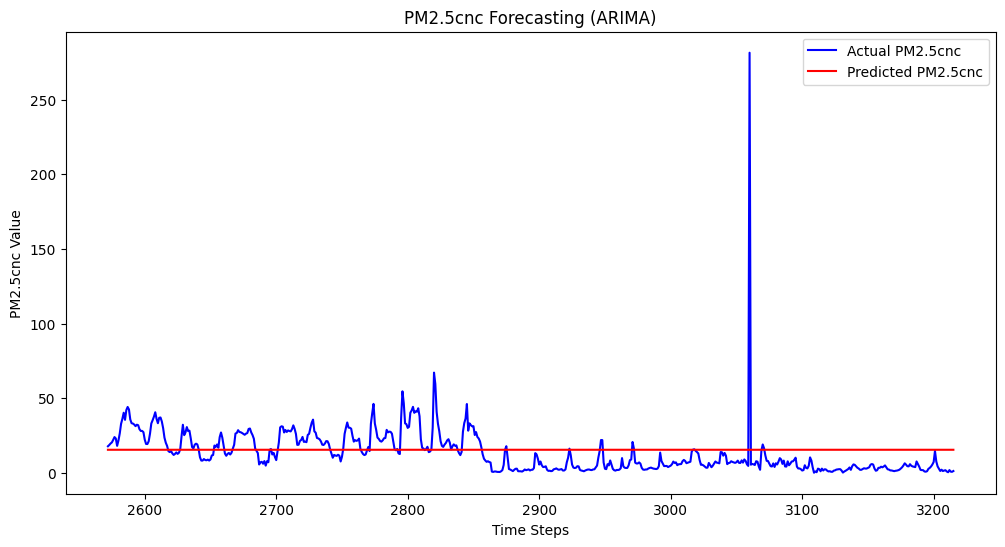

In [26]:
# Plot the actual and predicted values for 'pm2.5cnc'
plt.figure(figsize=(12, 6))
plt.plot(X_test_pm2_5cnc, label='Actual PM2.5cnc', color='blue')
plt.plot(forecast_pm2_5cnc, label='Predicted PM2.5cnc', color='red')
plt.title('PM2.5cnc Forecasting (ARIMA)')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5cnc Value')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
arima_mse = mean_squared_error(X_test_pm10cnc, forecast_pm10cnc)
print("ARIMA PM10CNC MSE:", arima_mse)
arima_mae = mean_absolute_error(X_test_pm10cnc, forecast_pm10cnc)
print("ARIMA PM10CNC MAE:", arima_mae)
arima_rmse = np.sqrt(arima_mse)
print("ARIMA PM10CNC RMSE:", arima_rmse)

ARIMA PM10CNC MSE: 335.05978504764715
ARIMA PM10CNC MAE: 13.337618121923056
ARIMA PM10CNC RMSE: 18.304638347906444


## **SRIMA Algorithm**

In [28]:

# Extract the target variable 'pm10cnc'
target_pm10cnc = combined_df['pm10cnc']


# Extract the target variable 'pm10cnc'
target_pm2_5cnc = combined_df['pm2.5cnc']

# Split the data into training and testing sets
X_train_pm10cnc, X_test_pm10cnc = train_test_split(target_pm10cnc, test_size=0.2, shuffle=False)
# Split the data into training and testing sets
X_train_pm2_5cnc, X_test_pm2_5cnc = train_test_split(target_pm2_5cnc, test_size=0.2, shuffle=False)

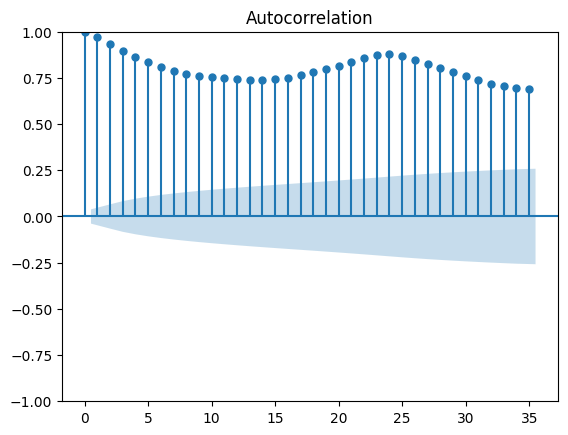

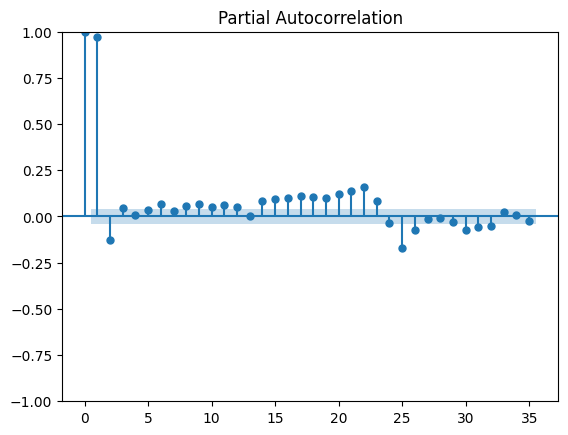

In [29]:
# Time series analysis to determine p, d, q, P, D, and Q values
# Plot ACF and PACF for 'pm10cnc'
plot_acf(X_train_pm10cnc)
plot_pacf(X_train_pm10cnc)
plt.show()

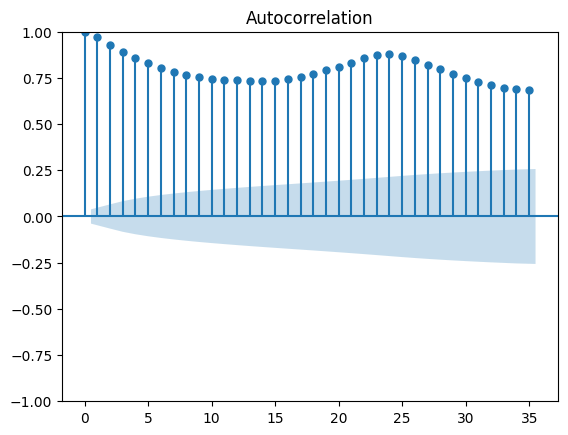

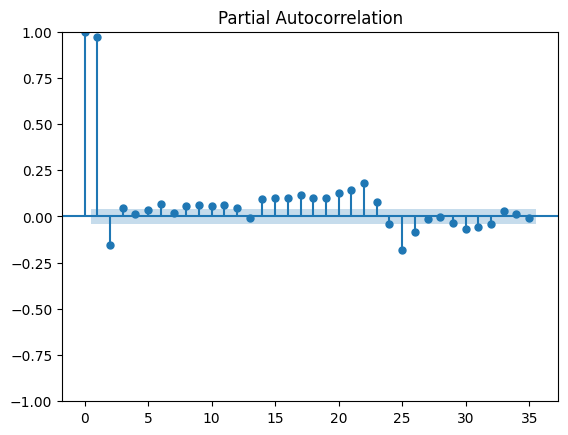

In [30]:
# Time series analysis to determine p, d, q, P, D, and Q values
# Plot ACF and PACF for 'pm10cnc'
plot_acf(X_train_pm2_5cnc)
plot_pacf(X_train_pm2_5cnc)
plt.show()

In [31]:
# Determine p, d, q, P, D, and Q for 'pm10cnc' from ACF and PACF plots
p = 1  # Adjust based on PACF plot
d = 1  # Adjust if differencing is needed
q = 1  # Adjust based on ACF plot
P = 1  # Seasonal order (adjust based on PACF plot)
D = 1  # Seasonal differencing (adjust if needed)
Q = 1  # Seasonal order (adjust based on ACF plot)
m = 12  # Seasonal period (adjust based on the data's seasonality)

In [32]:
# Build and fit the SARIMA model for 'pm10cnc'
model = SARIMAX(X_train_pm10cnc, order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit(disp=0)

In [33]:
# Forecast for 'pm10cnc'
forecast_steps = len(X_test_pm10cnc)
forecast = model_fit.get_forecast(steps=forecast_steps)

In [34]:
# Get the predicted values and the associated confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

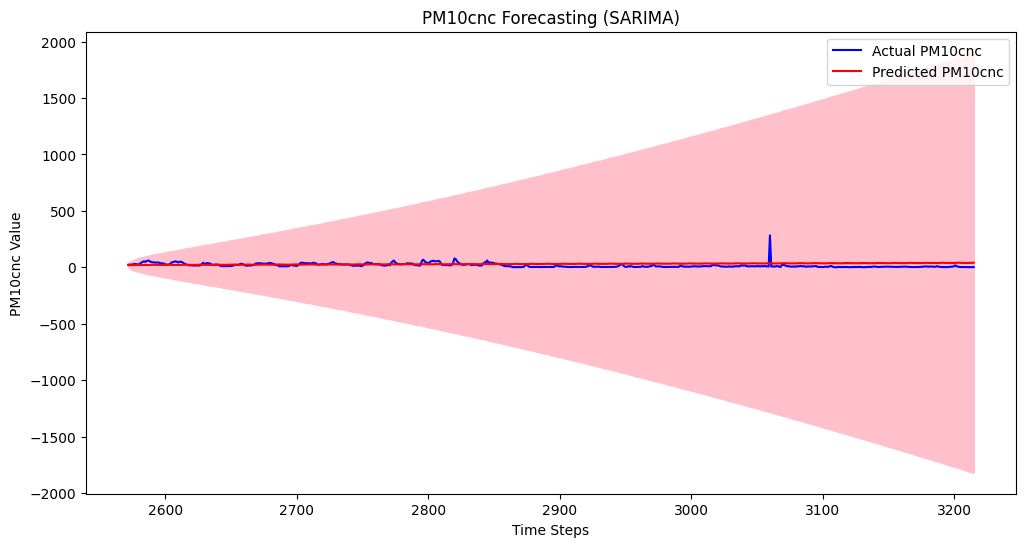

In [35]:
# Plot the actual and predicted values for 'pm10cnc'
plt.figure(figsize=(12, 6))
plt.plot(X_test_pm10cnc, label='Actual PM10cnc', color='blue')
plt.plot(forecast_values, label='Predicted PM10cnc', color='red')
plt.fill_between(forecast_values.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
plt.title('PM10cnc Forecasting (SARIMA)')
plt.xlabel('Time Steps')
plt.ylabel('PM10cnc Value')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
srima_mse_pm10 = mean_squared_error(X_test_pm10cnc, forecast_values)
print("SRIMA PM10CNC MSE:", srima_mse_pm10)
from sklearn.metrics import mean_absolute_error
srima_mae_pm10 = mean_absolute_error(X_test_pm10cnc, forecast_values)
print("SRIMA PM10CNC MAE:", srima_mae_pm10)
srima_rmse_pm10 = np.sqrt(srima_mae_pm10)
print("SRIMA PM10CNC RMSE:", srima_rmse_pm10)

SRIMA PM10CNC MSE: 626.3296569505201
SRIMA PM10CNC MAE: 20.523096524066073
SRIMA PM10CNC RMSE: 4.530242435462596


In [37]:
# Build and fit the SARIMA model for 'pm10cnc'
model_pm2_5 = SARIMAX(X_train_pm2_5cnc, order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model_pm2_5.fit(disp=0)

In [38]:
# Forecast for 'pm10cnc'
forecast_steps = len(X_test_pm2_5cnc)
forecast = model_fit.get_forecast(steps=forecast_steps)

# Get the predicted values and the associated confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

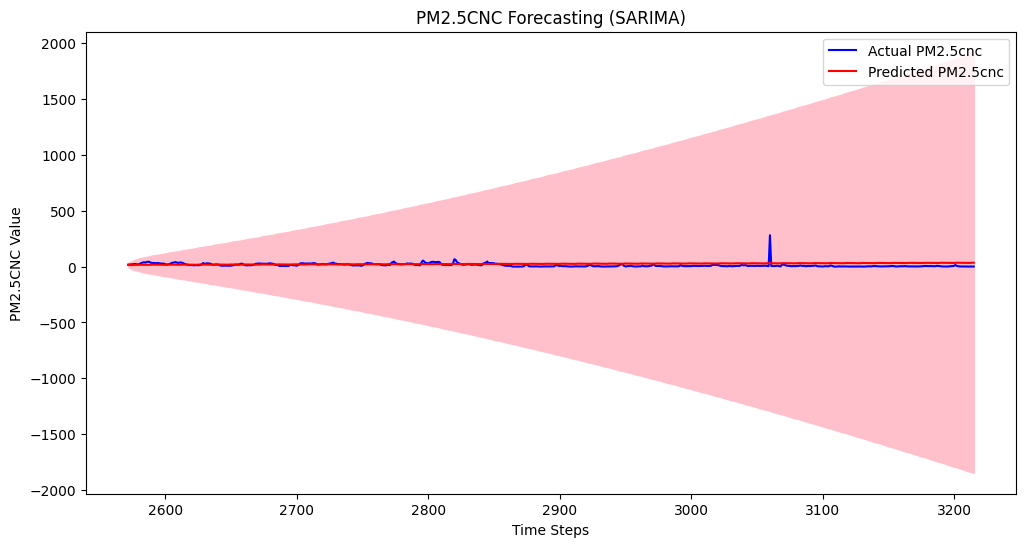

In [39]:
# Plot the actual and predicted values for 'pm10cnc'
plt.figure(figsize=(12, 6))
plt.plot(X_test_pm2_5cnc, label='Actual PM2.5cnc', color='blue')
plt.plot(forecast_values, label='Predicted PM2.5cnc', color='red')
plt.fill_between(forecast_values.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
plt.title('PM2.5CNC Forecasting (SARIMA)')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5CNC Value')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error
srima_mse_pm25 = mean_squared_error(X_test_pm2_5cnc, forecast_values)
print("SRIMA PM10CNC MSE:",srima_mse_pm25)
srima_mae_pm25 = mean_absolute_error(X_test_pm2_5cnc, forecast_values)
print("SRIMA PM10CNC MAE:", srima_mae_pm25)
srima_rmse_pm25 = np.sqrt(srima_mae_pm25)
print("SRIMA PM10CNC RMSE:",srima_rmse_pm25)

SRIMA PM10CNC MSE: 484.6652580163742
SRIMA PM10CNC MAE: 17.436268429958282
SRIMA PM10CNC RMSE: 4.175675805179119


In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [42]:
# Extract relevant features and target columns
features = combined_df[['temp', 'rh']].values
target = combined_df[['pm10cnc', 'pm2.5cnc']].values

In [43]:
# Perform feature scaling (you may need to adjust the scaler)
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
target = scaler.fit_transform(target)

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

In [45]:
sequence_length = 10  # You can adjust this value
X_train_seq, y_train_seq = [], []
for i in range(sequence_length, len(X_train)):
    X_train_seq.append(X_train[i - sequence_length:i])
    y_train_seq.append(y_train[i])

In [46]:
X_train_seq, y_train_seq = np.array(X_train_seq), np.array(y_train_seq)

## **LSTM Neural Network**

In [47]:
# Build the LSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(tf.keras.layers.LSTM(units=50, return_sequences=False))
model.add(tf.keras.layers.Dense(2))  # 2 output neurons for your two target variables

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
# Train the model
model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32)

Epoch 1/50
81/81 [==============================] - 6s 15ms/step - loss: 0.0161
Epoch 2/50
81/81 [==============================] - 1s 14ms/step - loss: 0.0117
Epoch 3/50
81/81 [==============================] - 1s 14ms/step - loss: 0.0113
Epoch 4/50
81/81 [==============================] - 1s 17ms/step - loss: 0.0090
Epoch 5/50
81/81 [==============================] - 2s 21ms/step - loss: 0.0082
Epoch 6/50
81/81 [==============================] - 2s 22ms/step - loss: 0.0075
Epoch 7/50
81/81 [==============================] - 1s 18ms/step - loss: 0.0074
Epoch 8/50
81/81 [==============================] - 1s 14ms/step - loss: 0.0076
Epoch 9/50
81/81 [==============================] - 1s 14ms/step - loss: 0.0078
Epoch 10/50
81/81 [==============================] - 1s 14ms/step - loss: 0.0077
Epoch 11/50
81/81 [==============================] - 1s 14ms/step - loss: 0.0073
Epoch 12/50
81/81 [==============================] - 1s 14ms/step - loss: 0.0077
Epoch 13/50
81/81 [==================

In [50]:
# Evaluate the model on the test set
X_test_seq, y_test_seq = [], []
for i in range(sequence_length, len(X_test)):
    X_test_seq.append(X_test[i - sequence_length:i])
    y_test_seq.append(y_test[i])

In [51]:
X_test_seq, y_test_seq = np.array(X_test_seq), np.array(y_test_seq)

y_pred = model.predict(X_test_seq)

20/20 [==============================] - 1s 5ms/step


In [52]:
loss=model.evaluate(X_test_seq)
print("Loss of this model:-",loss)

20/20 [==============================] - 1s 2ms/step - loss: 0.0000e+00
Loss of this model:- 0.0


In [53]:
# Inverse scaling to get actual predictions
y_pred = scaler.inverse_transform(y_pred)
y_test_seq = scaler.inverse_transform(y_test_seq)

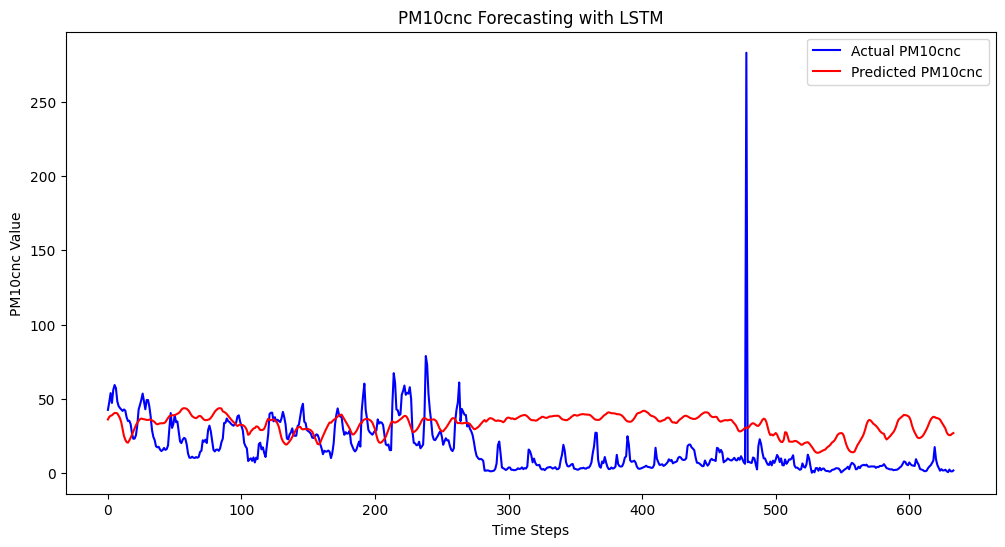

In [54]:
# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq[:, 0], label='Actual PM10cnc', color='blue')
plt.plot(y_pred[:, 0], label='Predicted PM10cnc', color='red')
plt.title('PM10cnc Forecasting with LSTM')
plt.xlabel('Time Steps')
plt.ylabel('PM10cnc Value')
plt.legend()
plt.show()

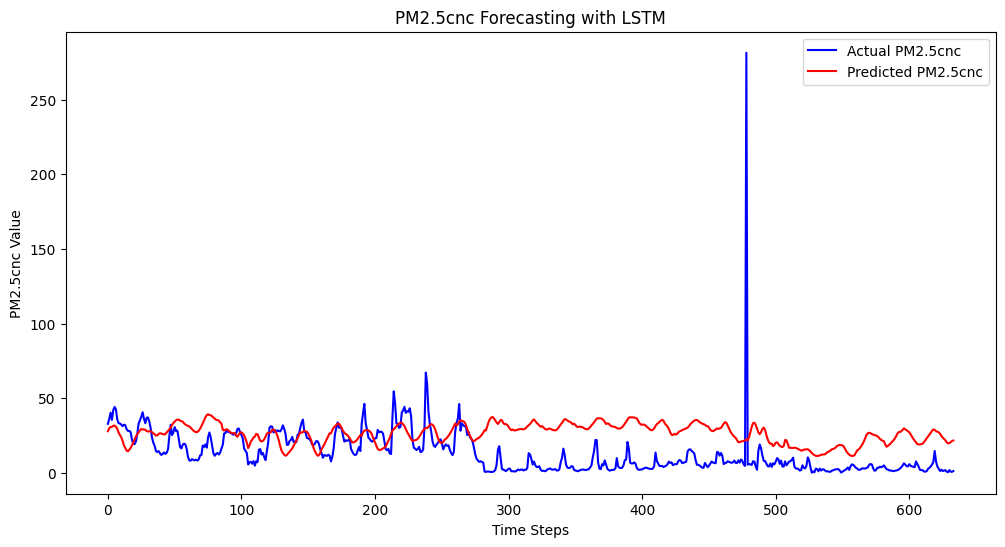

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq[:, 1], label='Actual PM2.5cnc', color='blue')
plt.plot(y_pred[:, 1], label='Predicted PM2.5cnc', color='red')
plt.title('PM2.5cnc Forecasting with LSTM')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5cnc Value')
plt.legend()
plt.show()

In [56]:
# Make predictions on your test data
y_pred = model.predict(X_test_seq)

20/20 [==============================] - 0s 5ms/step


In [57]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
lstm_mse = mean_squared_error(y_test_seq, y_pred)
print("LSTM MSE:", lstm_mse)
lstm_mae = mean_absolute_error(y_test_seq, y_pred)
print("LSTM MAE:", lstm_mae)
lstm_rmse = np.sqrt(lstm_mse)
print("LSTM RMSE:", lstm_rmse)

LSTM MSE: 517.055834665252
LSTM MAE: 14.97138131967117
LSTM RMSE: 22.73886177154107


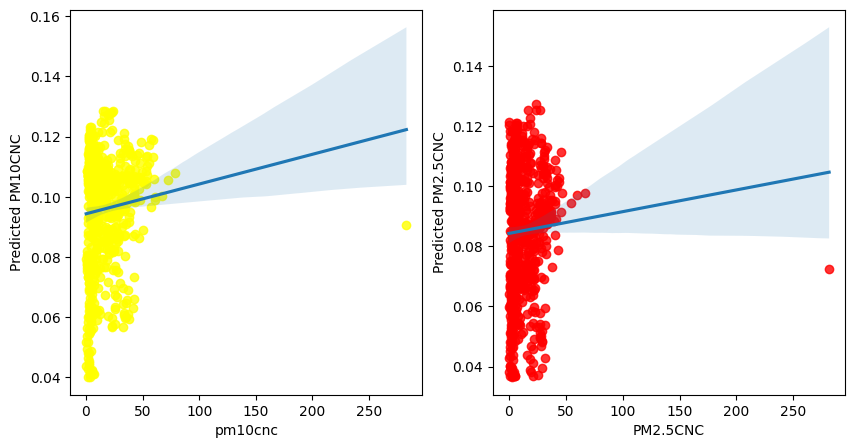

In [58]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(x=y_test_seq[:,0],y=y_pred[:,0],scatter_kws={'color': 'yellow'})
plt.xlabel("pm10cnc")
plt.ylabel("Predicted PM10CNC")

plt.subplot(1,2,2)
sns.regplot(x=y_test_seq[:,1],y=y_pred[:,1],scatter_kws={'color': 'red'})
plt.xlabel("PM2.5CNC")
plt.ylabel("Predicted PM2.5CNC")

plt.show()

In [59]:
# Define the function to generate forecasts for 30 time steps
def generate_forecast(model, data, look_back=30, forecast_steps=30):
    # Create an array to store the forecast
    forecast = np.empty((forecast_steps, data.shape[1]))
    forecast[:] = np.nan

    # Initialize the input sequence with the last 'look_back' values from the data
    input_sequence = data[-look_back:]

    for i in range(forecast_steps):
        # Reshape the input sequence to match the model's input shape
        input_sequence_reshaped = input_sequence.reshape(1, look_back, data.shape[1])

        # Make a prediction for the next time step
        next_step = model.predict(input_sequence_reshaped)

        # Append the prediction to the forecast
        forecast[i] = next_step[0]  # Extract the prediction from the batch dimension

        # Update the input sequence for the next time step
        input_sequence = np.vstack((input_sequence, next_step))
        input_sequence = input_sequence[1:]  # Remove the first element

    return forecast

In [60]:
X_test_seq.shape

(634, 10, 2)

In [61]:
X_test

array([[0.80579971, 0.72011046],
       [0.82061999, 0.63953866],
       [0.83908046, 0.59795322],
       ...,
       [0.79171021, 0.57919103],
       [0.7882271 , 0.56481481],
       [0.77742947, 0.5562201 ]])

In [62]:
X_test_filt=np.array(X_test)

In [63]:
X_test_filt

array([[0.80579971, 0.72011046],
       [0.82061999, 0.63953866],
       [0.83908046, 0.59795322],
       ...,
       [0.79171021, 0.57919103],
       [0.7882271 , 0.56481481],
       [0.77742947, 0.5562201 ]])

In [64]:
# Generate forecasts for the next 100 time steps
forecast = generate_forecast(model, X_test_filt, look_back=30, forecast_steps=30)

# Inverse transform the forecast data to obtain original scale
forecast_original_scale = scaler.inverse_transform(forecast)

1/1 [==============================] - 0s 26ms/step


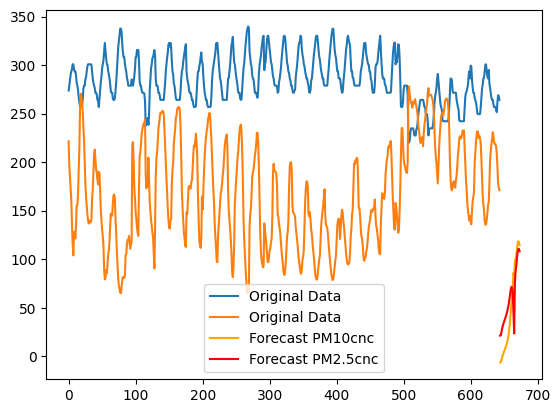

In [65]:
# Plot the original data, training predictions, and forecast
plt.plot(scaler.inverse_transform(X_test_filt), label="Original Data")
# plt.plot(trainPredictPlot, label="Train Data")
# plt.plot(testPredictionPlot, label="Test Data")
plt.plot(len(X_test_filt) + np.arange(30), forecast_original_scale[:, 0], label="Forecast PM10cnc", color='orange')
plt.plot(len(X_test_filt) + np.arange(30), forecast_original_scale[:, 1], label="Forecast PM2.5cnc", color='red')

plt.legend()
plt.show()

In [66]:
X_train_seq.shape[1]

10

## **Elman network model**

In [67]:
# Create an Elman network model
model2 = tf.keras.Sequential()

# Hidden layer (Recurrent)
model2.add(tf.keras.layers.SimpleRNN(10, activation='tanh', return_sequences=False))

# Output layer
model2.add(tf.keras.layers.Dense(1))

In [68]:
# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

In [69]:
# Train the model
history3=model2.fit(X_train_seq, y_train_seq, epochs=100, batch_size=16)

Epoch 1/100
161/161 [==============================] - 2s 6ms/step - loss: 0.0303
Epoch 2/100
161/161 [==============================] - 1s 6ms/step - loss: 0.0111
Epoch 3/100
161/161 [==============================] - 1s 6ms/step - loss: 0.0097
Epoch 4/100
161/161 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 5/100
161/161 [==============================] - 1s 5ms/step - loss: 0.0086
Epoch 6/100
161/161 [==============================] - 1s 4ms/step - loss: 0.0083
Epoch 7/100
161/161 [==============================] - 1s 4ms/step - loss: 0.0082
Epoch 8/100
161/161 [==============================] - 1s 4ms/step - loss: 0.0078
Epoch 9/100
161/161 [==============================] - 1s 4ms/step - loss: 0.0075
Epoch 10/100
161/161 [==============================] - 1s 4ms/step - loss: 0.0080
Epoch 11/100
161/161 [==============================] - 1s 4ms/step - loss: 0.0074
Epoch 12/100
161/161 [==============================] - 1s 4ms/step - loss: 0.0075
Epoch 13/100


In [70]:
# Evaluate the model
y_pred_rnn = model.predict(X_test_seq)

# Calculate Mean Squared Error (MSE)
mse_rnn = mean_squared_error(y_test_seq[:,0],y_pred_rnn[:,0])
print("MSE:",mse_rnn)

# Calculate Mean absulate Error (MSE)
mae_rnn = mean_absolute_error(y_test_seq[:,0],y_pred_rnn[:,0])
print("MSE:",mae_rnn)

# Calculate Root Mean Squared Error (MSE)
rmse_rnn = np.sqrt(mean_squared_error(y_test_seq[:,0],y_pred_rnn[:,0]))
print("MSE:",rmse_rnn)

20/20 [==============================] - 0s 7ms/step
MSE: 610.7954080531207
MSE: 16.740347135287077
MSE: 24.714275390007305


## **Bidirectional LSTM**

In [71]:
# Build the LSTM model
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]))))
model2.add(tf.keras.layers.LSTM(units=50, return_sequences=False))
model2.add(tf.keras.layers.Dense(2))  # 2 output neurons for your two target variables

In [72]:
# Compile the model
model2.compile(optimizer='rmsprop', loss='mean_squared_error')

In [73]:
# Train the model
model2.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32)

Epoch 1/50
81/81 [==============================] - 11s 27ms/step - loss: 0.0163
Epoch 2/50
81/81 [==============================] - 2s 19ms/step - loss: 0.0127
Epoch 3/50
81/81 [==============================] - 3s 32ms/step - loss: 0.0125
Epoch 4/50
81/81 [==============================] - 5s 64ms/step - loss: 0.0121
Epoch 5/50
81/81 [==============================] - 3s 34ms/step - loss: 0.0118
Epoch 6/50
81/81 [==============================] - 3s 40ms/step - loss: 0.0117
Epoch 7/50
81/81 [==============================] - 3s 37ms/step - loss: 0.0115
Epoch 8/50
81/81 [==============================] - 4s 55ms/step - loss: 0.0114
Epoch 9/50
81/81 [==============================] - 3s 42ms/step - loss: 0.0111
Epoch 10/50
81/81 [==============================] - 3s 39ms/step - loss: 0.0108
Epoch 11/50
81/81 [==============================] - 2s 30ms/step - loss: 0.0099
Epoch 12/50
81/81 [==============================] - 1s 18ms/step - loss: 0.0095
Epoch 13/50
81/81 [=================

In [74]:
# Evaluate the model on the test set
X_test_seq, y_test_seq = [], []
for i in range(sequence_length, len(X_test)):
    X_test_seq.append(X_test[i - sequence_length:i])
    y_test_seq.append(y_test[i])

In [75]:
X_test_seq, y_test_seq = np.array(X_test_seq), np.array(y_test_seq)

y_pred = model2.predict(X_test_seq)

20/20 [==============================] - 1s 6ms/step


In [76]:
loss=model2.evaluate(X_train_seq, y_train_seq)
print("Loss on train dataset of this model:-",loss)

81/81 [==============================] - 2s 6ms/step - loss: 0.0071
Loss on train dataset of this model:- 0.0070601352490484715


In [77]:
# Inverse scaling to get actual predictions
y_pred = scaler.inverse_transform(y_pred)
y_test_seq = scaler.inverse_transform(y_test_seq)

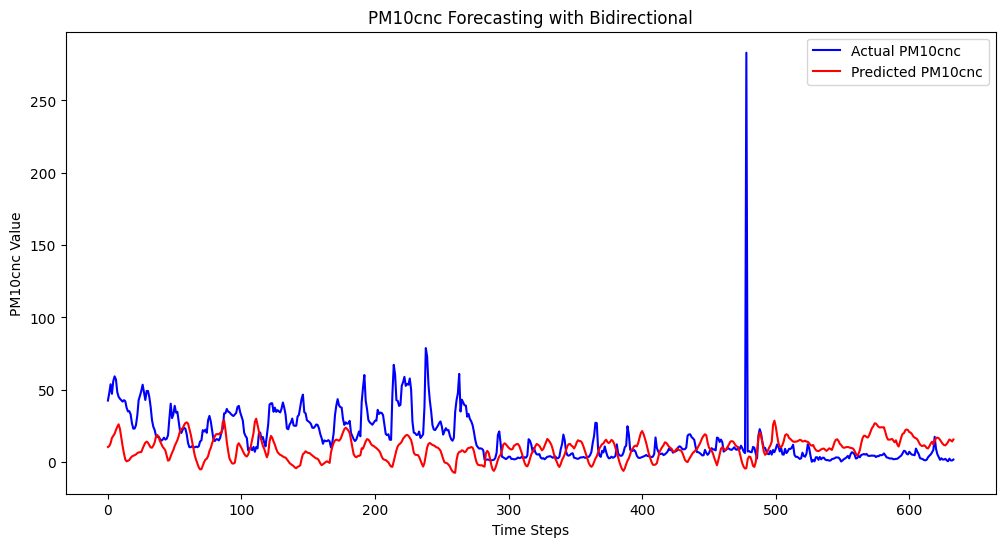

In [78]:
# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq[:, 0], label='Actual PM10cnc', color='blue')
plt.plot(y_pred[:, 0], label='Predicted PM10cnc', color='red')
plt.title('PM10cnc Forecasting with Bidirectional')
plt.xlabel('Time Steps')
plt.ylabel('PM10cnc Value')
plt.legend()
plt.show()

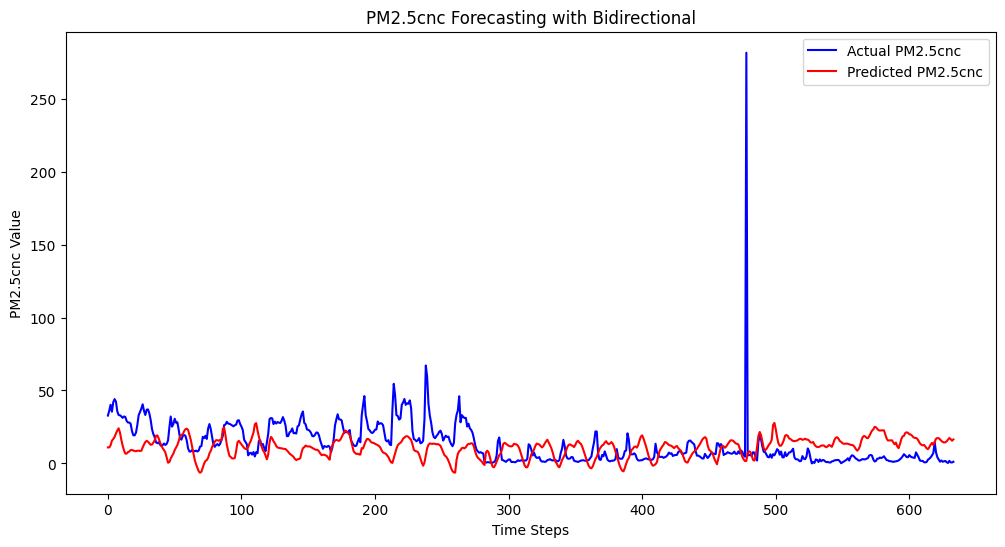

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq[:, 1], label='Actual PM2.5cnc', color='blue')
plt.plot(y_pred[:, 1], label='Predicted PM2.5cnc', color='red')
plt.title('PM2.5cnc Forecasting with Bidirectional')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5cnc Value')
plt.legend()
plt.show()

In [80]:
# Calculate Mean Squared Error (MSE)
blstm_mse = mean_squared_error(y_test_seq, y_pred)
print("BLSTM MSE:", blstm_mse)
blstm_mae = mean_absolute_error(y_test_seq, y_pred)
print("BLSTM MAE:", blstm_mae)
blstm_rmse = np.sqrt(blstm_mse)
print("BLSTM RMSE:", blstm_rmse)

BLSTM MSE: 382.05118016460233
BLSTM MAE: 13.149288949826897
BLSTM RMSE: 19.54612954435231


In [82]:
y_test_seq

array([[42.56451613, 32.79032258],
       [47.77419355, 36.12903226],
       [53.84126984, 40.22222222],
       ...,
       [ 1.22580645,  0.70967742],
       [ 1.12903226,  0.61290323],
       [ 1.77272727,  1.13636364]])

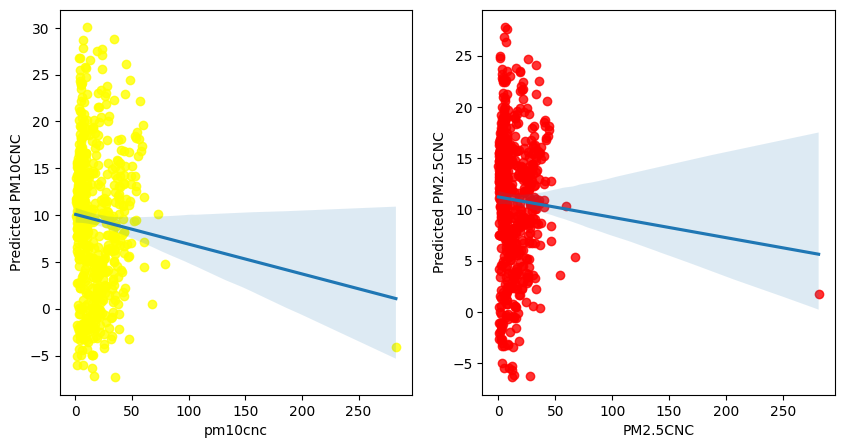

In [83]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(x=y_test_seq[:,0],y=y_pred[:,0],scatter_kws={'color': 'yellow'})
plt.xlabel("pm10cnc")
plt.ylabel("Predicted PM10CNC")

plt.subplot(1,2,2)
sns.regplot(x=y_test_seq[:,1],y=y_pred[:,1],scatter_kws={'color': 'red'})
plt.xlabel("PM2.5CNC")
plt.ylabel("Predicted PM2.5CNC")

plt.show()

## **XGBoosting Regressor**

In [84]:
from xgboost import XGBRegressor,XGBRFRegressor

In [85]:
xgbr=XGBRegressor()
xgbrf=XGBRFRegressor()

In [86]:
combined_df.head()

,dt_time,pm10cnc,temp,rh,deviceid,pm2.5cnc
0,2023-01-02 09:00:00,69.585366,32.000000,51.121951,E098060F06C3,55.560976
1,2023-01-02 10:00:00,66.322581,32.000000,49.177419,E098060F06C3,52.112903
2,2023-01-02 11:00:00,69.730159,32.380952,45.015873,E098060F06C3,56.047619
3,2023-01-02 12:00:00,69.225806,32.967742,42.435484,E098060F06C3,55.080645
4,2023-01-02 13:00:00,70.571429,32.571429,42.047619,E098060F06C3,57.095238


In [87]:
X=combined_df.drop(columns=['pm10cnc','pm2.5cnc','deviceid'])
y=combined_df[['pm10cnc','pm2.5cnc']]

In [88]:
X,y

(                 dt_time       temp         rh
 0    2023-01-02 09:00:00  32.000000  51.121951
 1    2023-01-02 10:00:00  32.000000  49.177419
 2    2023-01-02 11:00:00  32.380952  45.015873
 3    2023-01-02 12:00:00  32.967742  42.435484
 4    2023-01-02 13:00:00  32.571429  42.047619
 ...                  ...        ...        ...
 3211 2023-06-30 06:00:00  34.274194  44.935484
 3212 2023-06-30 07:00:00  35.746032  41.968254
 3213 2023-06-30 08:00:00  36.661290  38.338710
 3214 2023-06-30 09:00:00  36.500000  37.387097
 3215 2023-06-30 10:00:00  36.000000  36.818182
 
 [3216 rows x 3 columns],
         pm10cnc   pm2.5cnc
 0     69.585366  55.560976
 1     66.322581  52.112903
 2     69.730159  56.047619
 3     69.225806  55.080645
 4     70.571429  57.095238
 ...         ...        ...
 3211   0.629032   0.322581
 3212   2.380952   1.761905
 3213   1.225806   0.709677
 3214   1.129032   0.612903
 3215   1.772727   1.136364
 
 [3216 rows x 2 columns])

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [90]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2251, 3), (965, 3), (2251, 2), (965, 2))

In [91]:
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2251 entries, 1336 to 3174
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt_time  2251 non-null   datetime64[ns]
 1   temp     2251 non-null   float64       
 2   rh       2251 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 70.3 KB


In [93]:
X_train_scaled=stc.fit_transform(X_train[['temp','rh']])
X_test_scaled=stc.transform(X_test[['temp','rh']])

In [94]:
xgbr.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [95]:
y_pred_xgbr=xgbr.predict(X_test_scaled)

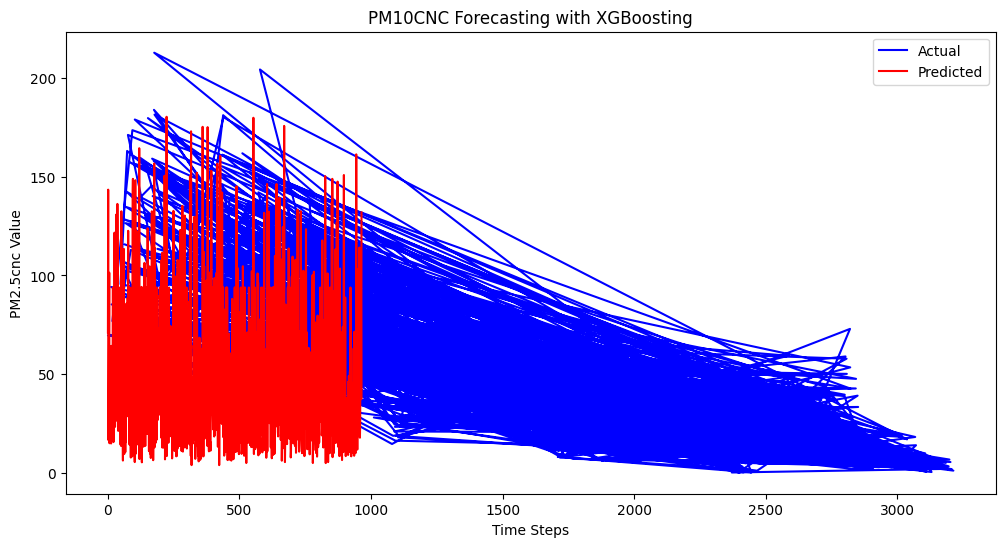

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(y_test['pm10cnc'], label='Actual', color='blue')
plt.plot(y_pred_xgbr[:,0], label='Predicted', color='red')
plt.title('PM10CNC Forecasting with XGBoosting')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5cnc Value')
plt.legend()
plt.show()

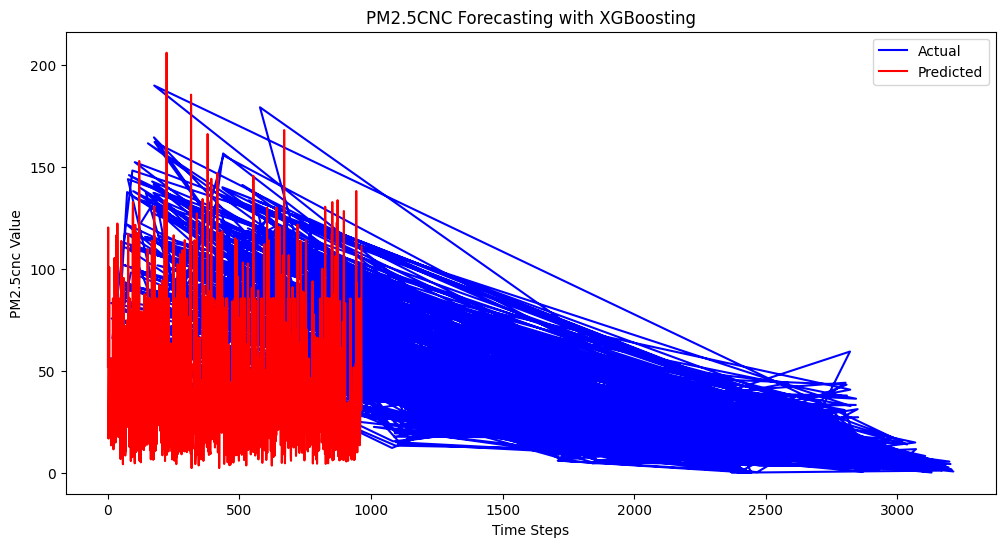

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(y_test['pm2.5cnc'], label='Actual', color='blue')
plt.plot(y_pred_xgbr[:,1], label='Predicted', color='red')
plt.title('PM2.5CNC Forecasting with XGBoosting')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5cnc Value')
plt.legend()
plt.show()

In [98]:
y_test.shape, y_pred_xgbr.shape,X_test_scaled.shape

((965, 2), (965, 2), (965, 2))

In [99]:
# Calculate Mean Squared Error (MSE)
xgbr_mse = mean_squared_error(y_test, y_pred_xgbr)
print("XGBR MSE:", xgbr_mse)
xgbr_mae = mean_absolute_error(y_test,y_pred_xgbr)
print("XGBR MAE:", xgbr_mae)
xgbr_rmse = np.sqrt(xgbr_mse)
print("XGBR RMSE:", xgbr_rmse)

XGBR MSE: 689.5416595844181
XGBR MAE: 18.260315868471757
XGBR RMSE: 26.25912526312364


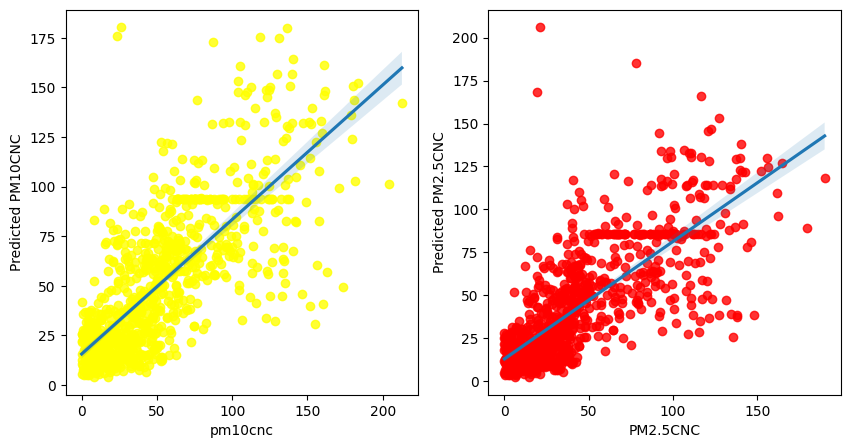

In [100]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(x=y_test['pm10cnc'],y=y_pred_xgbr[:,0],scatter_kws={'color': 'yellow'})
plt.xlabel("pm10cnc")
plt.ylabel("Predicted PM10CNC")

plt.subplot(1,2,2)
sns.regplot(x=y_test['pm2.5cnc'],y=y_pred_xgbr[:,1],scatter_kws={'color': 'red'})
plt.xlabel("PM2.5CNC")
plt.ylabel("Predicted PM2.5CNC")

plt.show()

## **Multi Layer Perceptron**

In [101]:
from sklearn.neural_network import MLPRegressor

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [103]:
mlpr=MLPRegressor()

In [104]:
X_train_scaled=stc.fit_transform(X_train[['temp','rh']])
X_test_scaled=stc.transform(X_test[['temp','rh']])

In [105]:
mlpr.fit(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [106]:
y_pred_mlp=mlpr.predict(X_test_scaled)

In [107]:
# Calculate Mean Squared Error (MSE)
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
print("MPL MSE:", mlp_mse)
mlp_mae = mean_absolute_error(y_test, y_pred_mlp)
print("MPL MAE:", mlp_mae)
mlp_rmse = np.sqrt(mlp_mse)
print("MPL RMSE:", mlp_rmse)

MPL MSE: 714.6792011472849
MPL MAE: 20.091308522148793
MPL RMSE: 26.73348464280863


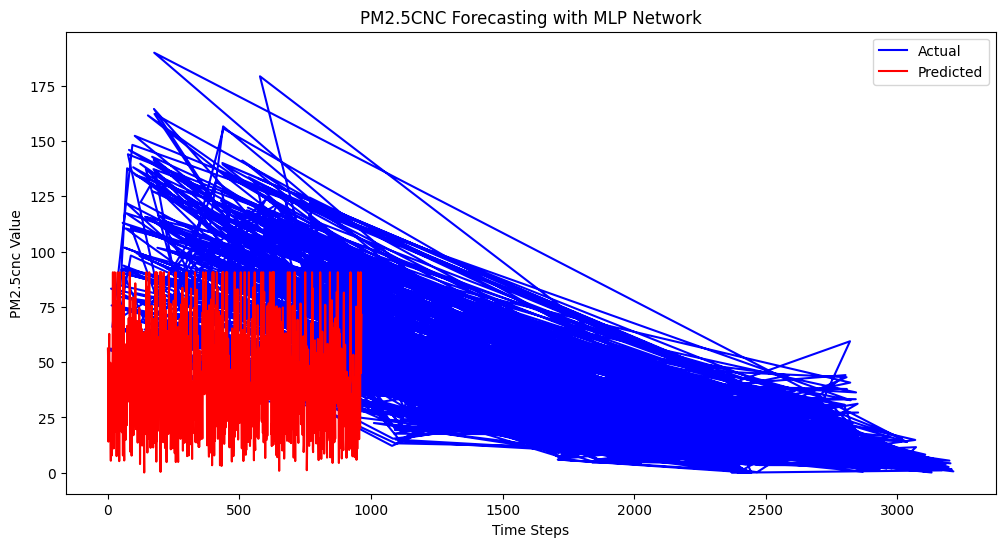

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(y_test['pm2.5cnc'], label='Actual', color='blue')
plt.plot(y_pred_mlp[:,1], label='Predicted', color='red')
plt.title('PM2.5CNC Forecasting with MLP Network')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5cnc Value')
plt.legend()
plt.show()

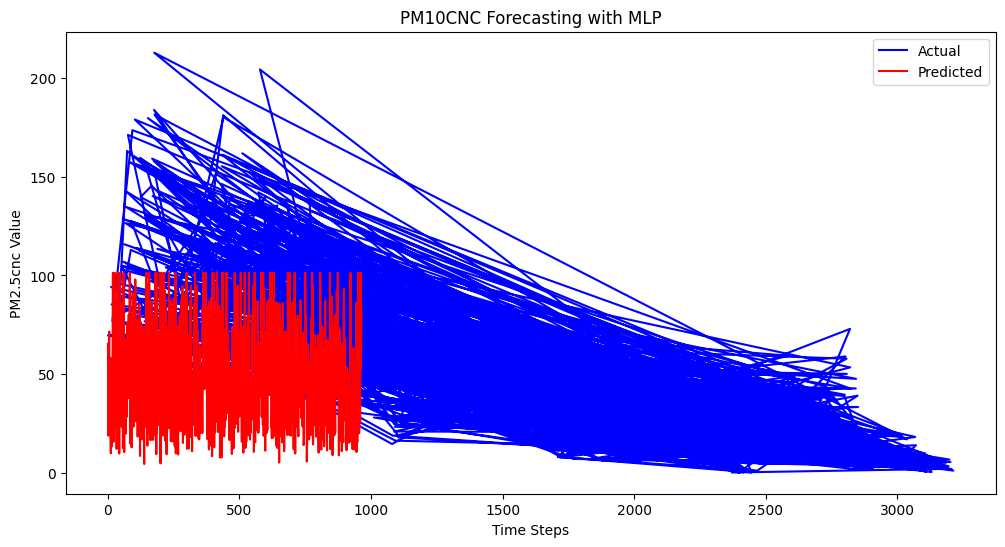

In [109]:
plt.figure(figsize=(12, 6))
plt.plot(y_test['pm10cnc'], label='Actual', color='blue')
plt.plot(y_pred_mlp[:,0], label='Predicted', color='red')
plt.title('PM10CNC Forecasting with MLP')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5cnc Value')
plt.legend()
plt.show()

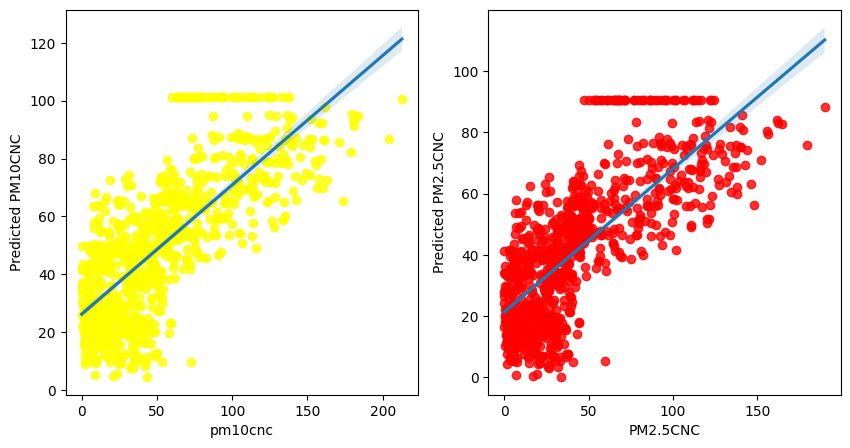

In [110]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(x=y_test['pm10cnc'],y=y_pred_mlp[:,0],scatter_kws={'color': 'yellow'})
plt.xlabel("pm10cnc")
plt.ylabel("Predicted PM10CNC")

plt.subplot(1,2,2)
sns.regplot(x=y_test['pm2.5cnc'],y=y_pred_mlp[:,1],scatter_kws={'color': 'red'})
plt.xlabel("PM2.5CNC")
plt.ylabel("Predicted PM2.5CNC")

plt.show()

In [141]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
import statsmodels.api as sm

In [155]:

model_score={
    "Model":["ARIMA","SRIMA PM10","SRIMA PM2.5","LSTM","Bidirectional LSTM","XGBR","Multi Layers Perceptron","Elman Network"],
    "MAE Score":[arima_mae,srima_mae_pm10,srima_mae_pm25,lstm_mae,blstm_mae,xgbr_mae,mlp_mae,mae_rnn],
    "MSE Score":[arima_mse,srima_mse_pm10,srima_mse_pm25,lstm_mse,blstm_mse,xgbr_mse,mlp_mse,mse_rnn],
    "RMSE Score":[arima_rmse,srima_rmse_pm10,srima_rmse_pm25,lstm_rmse,blstm_rmse,xgbr_rmse,mlp_rmse,mse_rnn]
}

In [156]:
model_score_df=pd.DataFrame(model_score)

In [157]:
model_score_df

,Model,MAE Score,MSE Score,RMSE Score
0,ARIMA,13.337618,335.059785,18.304638
1,SRIMA PM10,20.523097,626.329657,4.530242
2,SRIMA PM2.5,17.436268,484.665258,4.175676
3,LSTM,14.971381,517.055835,22.738862
4,Bidirectional LSTM,13.149289,382.051180,19.546130
5,XGBR,18.260316,689.541660,26.259125
6,Multi Layers Perceptron,20.091309,714.679201,26.733485
7,Elman Network,16.740347,610.795408,610.795408


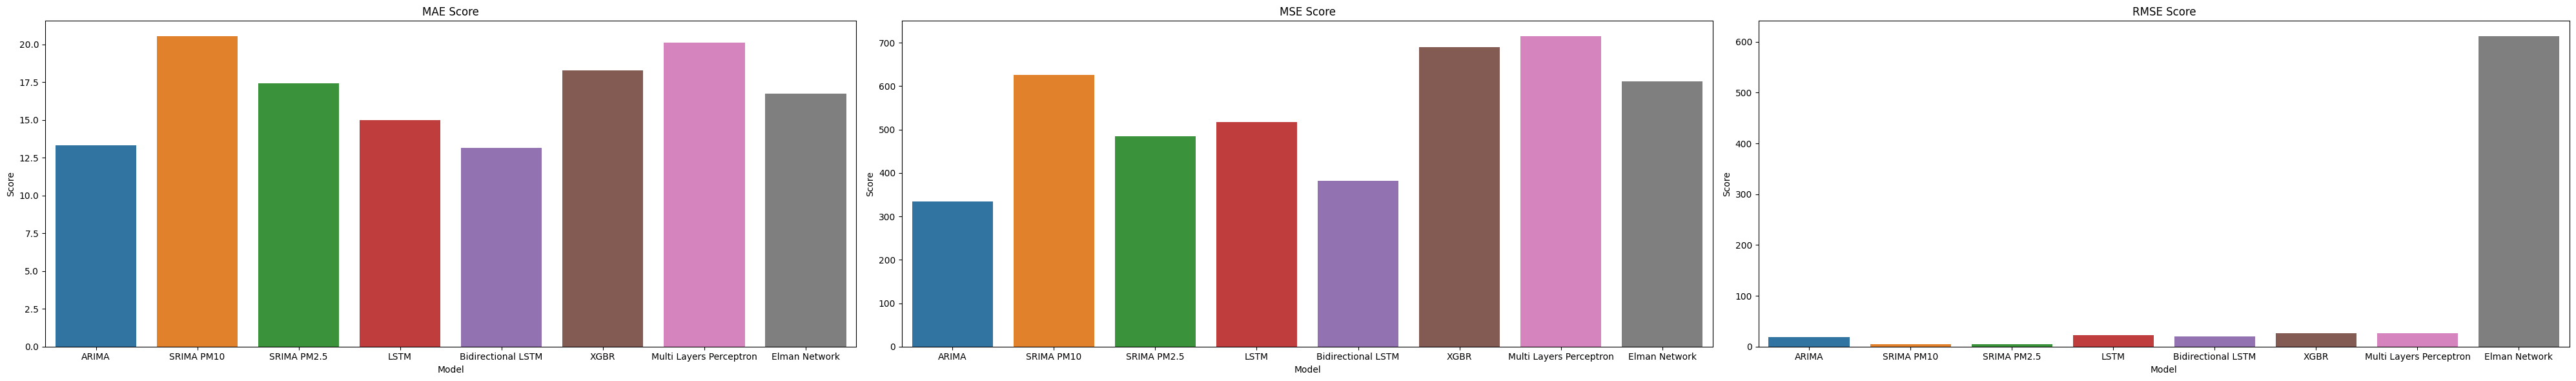

In [158]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(40, 6))

# Plot MAE
sns.barplot(data=model_score_df, x='Model', y='MAE Score', ax=axes[0])
axes[0].set_title('MAE Score')
axes[0].set_ylabel('Score')

# Plot MSE
sns.barplot(data=model_score_df, x='Model', y='MSE Score', ax=axes[1])
axes[1].set_title('MSE Score')
axes[1].set_ylabel('Score')

# Plot RMSE
sns.barplot(data=model_score_df, x='Model', y='RMSE Score', ax=axes[2])
axes[2].set_title('RMSE Score')
axes[2].set_ylabel('Score')

plt.tight_layout()
plt.show()

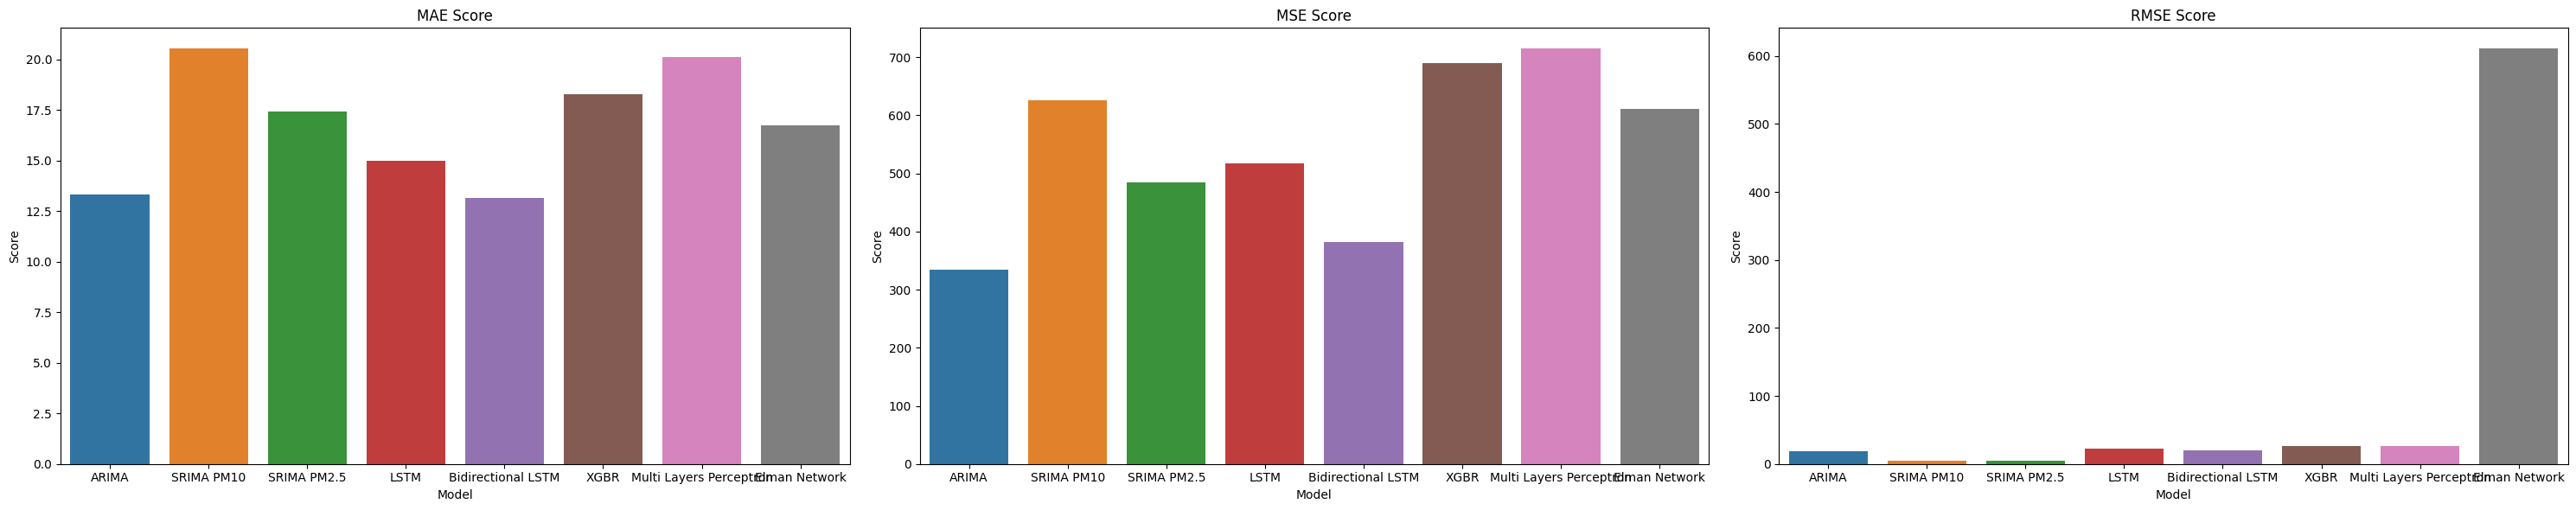

In [159]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 6))

# Define the metrics and their corresponding titles
metrics = ['MAE Score', 'MSE Score', 'RMSE Score']
titles = ['MAE Score', 'MSE Score', 'RMSE Score']

# Loop through the metrics and plot them one by one in the first row
for i, metric in enumerate(metrics):
    sns.barplot(data=model_score_df, x='Model', y=metric, ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Score')

# Remove the second and third rows of empty subplots
for j in range(3, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [164]:
combined_df[['dt_time','pm10cnc','temp','rh','pm2.5cnc']].sample(3)

,dt_time,pm10cnc,temp,rh,pm2.5cnc
746,2/5/2023 6:00,102.209677,0.000000,0.000000,93.225806
2583,5/12/2023 21:00,47.774194,39.451613,28.887097,36.129032
1725,3/20/2023 6:00,8.000000,28.000000,63.612903,6.370968


In [165]:
row = combined_df[['temp', 'rh']].iloc[3149]
# Transform the extracted values using the stc object
test_s = stc.transform(row.values.reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [166]:
row

temp    37.000000
rh      37.403226
Name: 3149, dtype: float64

In [167]:
test_s

array([[ 0.65063172, -0.31163052]])

## **One Sample test with XGBoosting**

In [168]:
xgbr.predict(test_s)

array([[15.23549 , 10.402705]], dtype=float32)

## **One Sample test with LSTM & Bidirectional LSTM**